# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
# Your code here
import pandas as pd 
data=pd.read_csv('../data/boston_data.csv')
data.shape

(404, 14)

In [2]:
data.dtypes

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [3]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [4]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


In [5]:
data.drop(['tax'], inplace=True, axis=1)

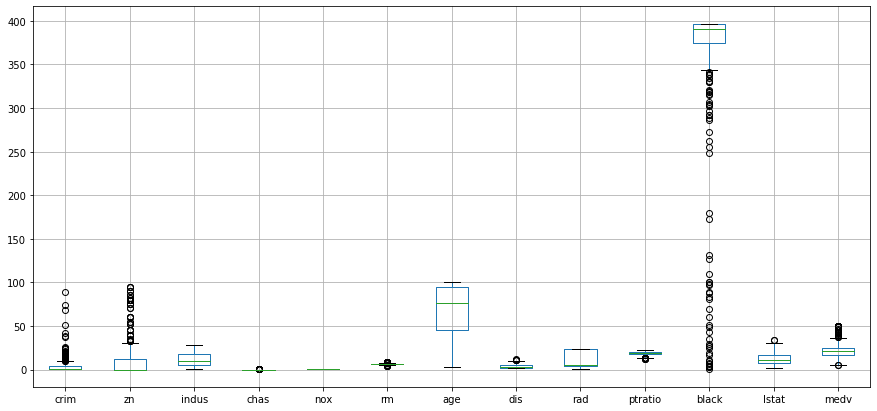

In [6]:
data.boxplot(figsize=(15,7))

In [27]:
data.black.quantile(0.05)

70.80700000000003

In [28]:
data.loc[data.black < 70]

,crim,zn,indus,chas,nox,rm,age,dis,rad,ptratio,black,lstat,medv
14,15.17720,0.0,18.1,0.0,0.740,6.152,100.0,1.9142,24.0,20.2,9.32,26.45,8.7
20,9.33889,0.0,18.1,0.0,0.679,6.380,95.6,1.9682,24.0,20.2,60.72,24.08,9.5
38,4.66883,0.0,18.1,0.0,0.713,5.976,87.9,2.5806,24.0,20.2,10.48,19.01,12.7
62,18.08460,0.0,18.1,0.0,0.679,6.434,100.0,1.8347,24.0,20.2,27.25,29.05,7.2
91,8.20058,0.0,18.1,0.0,0.713,5.936,80.3,2.7792,24.0,20.2,3.50,16.94,13.5
141,14.05070,0.0,18.1,0.0,0.597,6.657,100.0,1.5275,24.0,20.2,35.05,21.22,17.2
170,13.67810,0.0,18.1,0.0,0.740,5.935,87.9,1.8206,24.0,20.2,68.95,34.02,8.4
184,12.24720,0.0,18.1,0.0,0.584,5.837,59.7,1.9976,24.0,20.2,24.65,15.69,10.2
196,0.67180,0.0,18.1,0.0,0.740,6.459,94.8,1.9879,24.0,20.2,43.06,23.98,11.8
214,8.79212,0.0,18.1,0.0,0.584,5.565,70.6,2.0635,24.0,20.2,3.65,17.16,11.7


### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

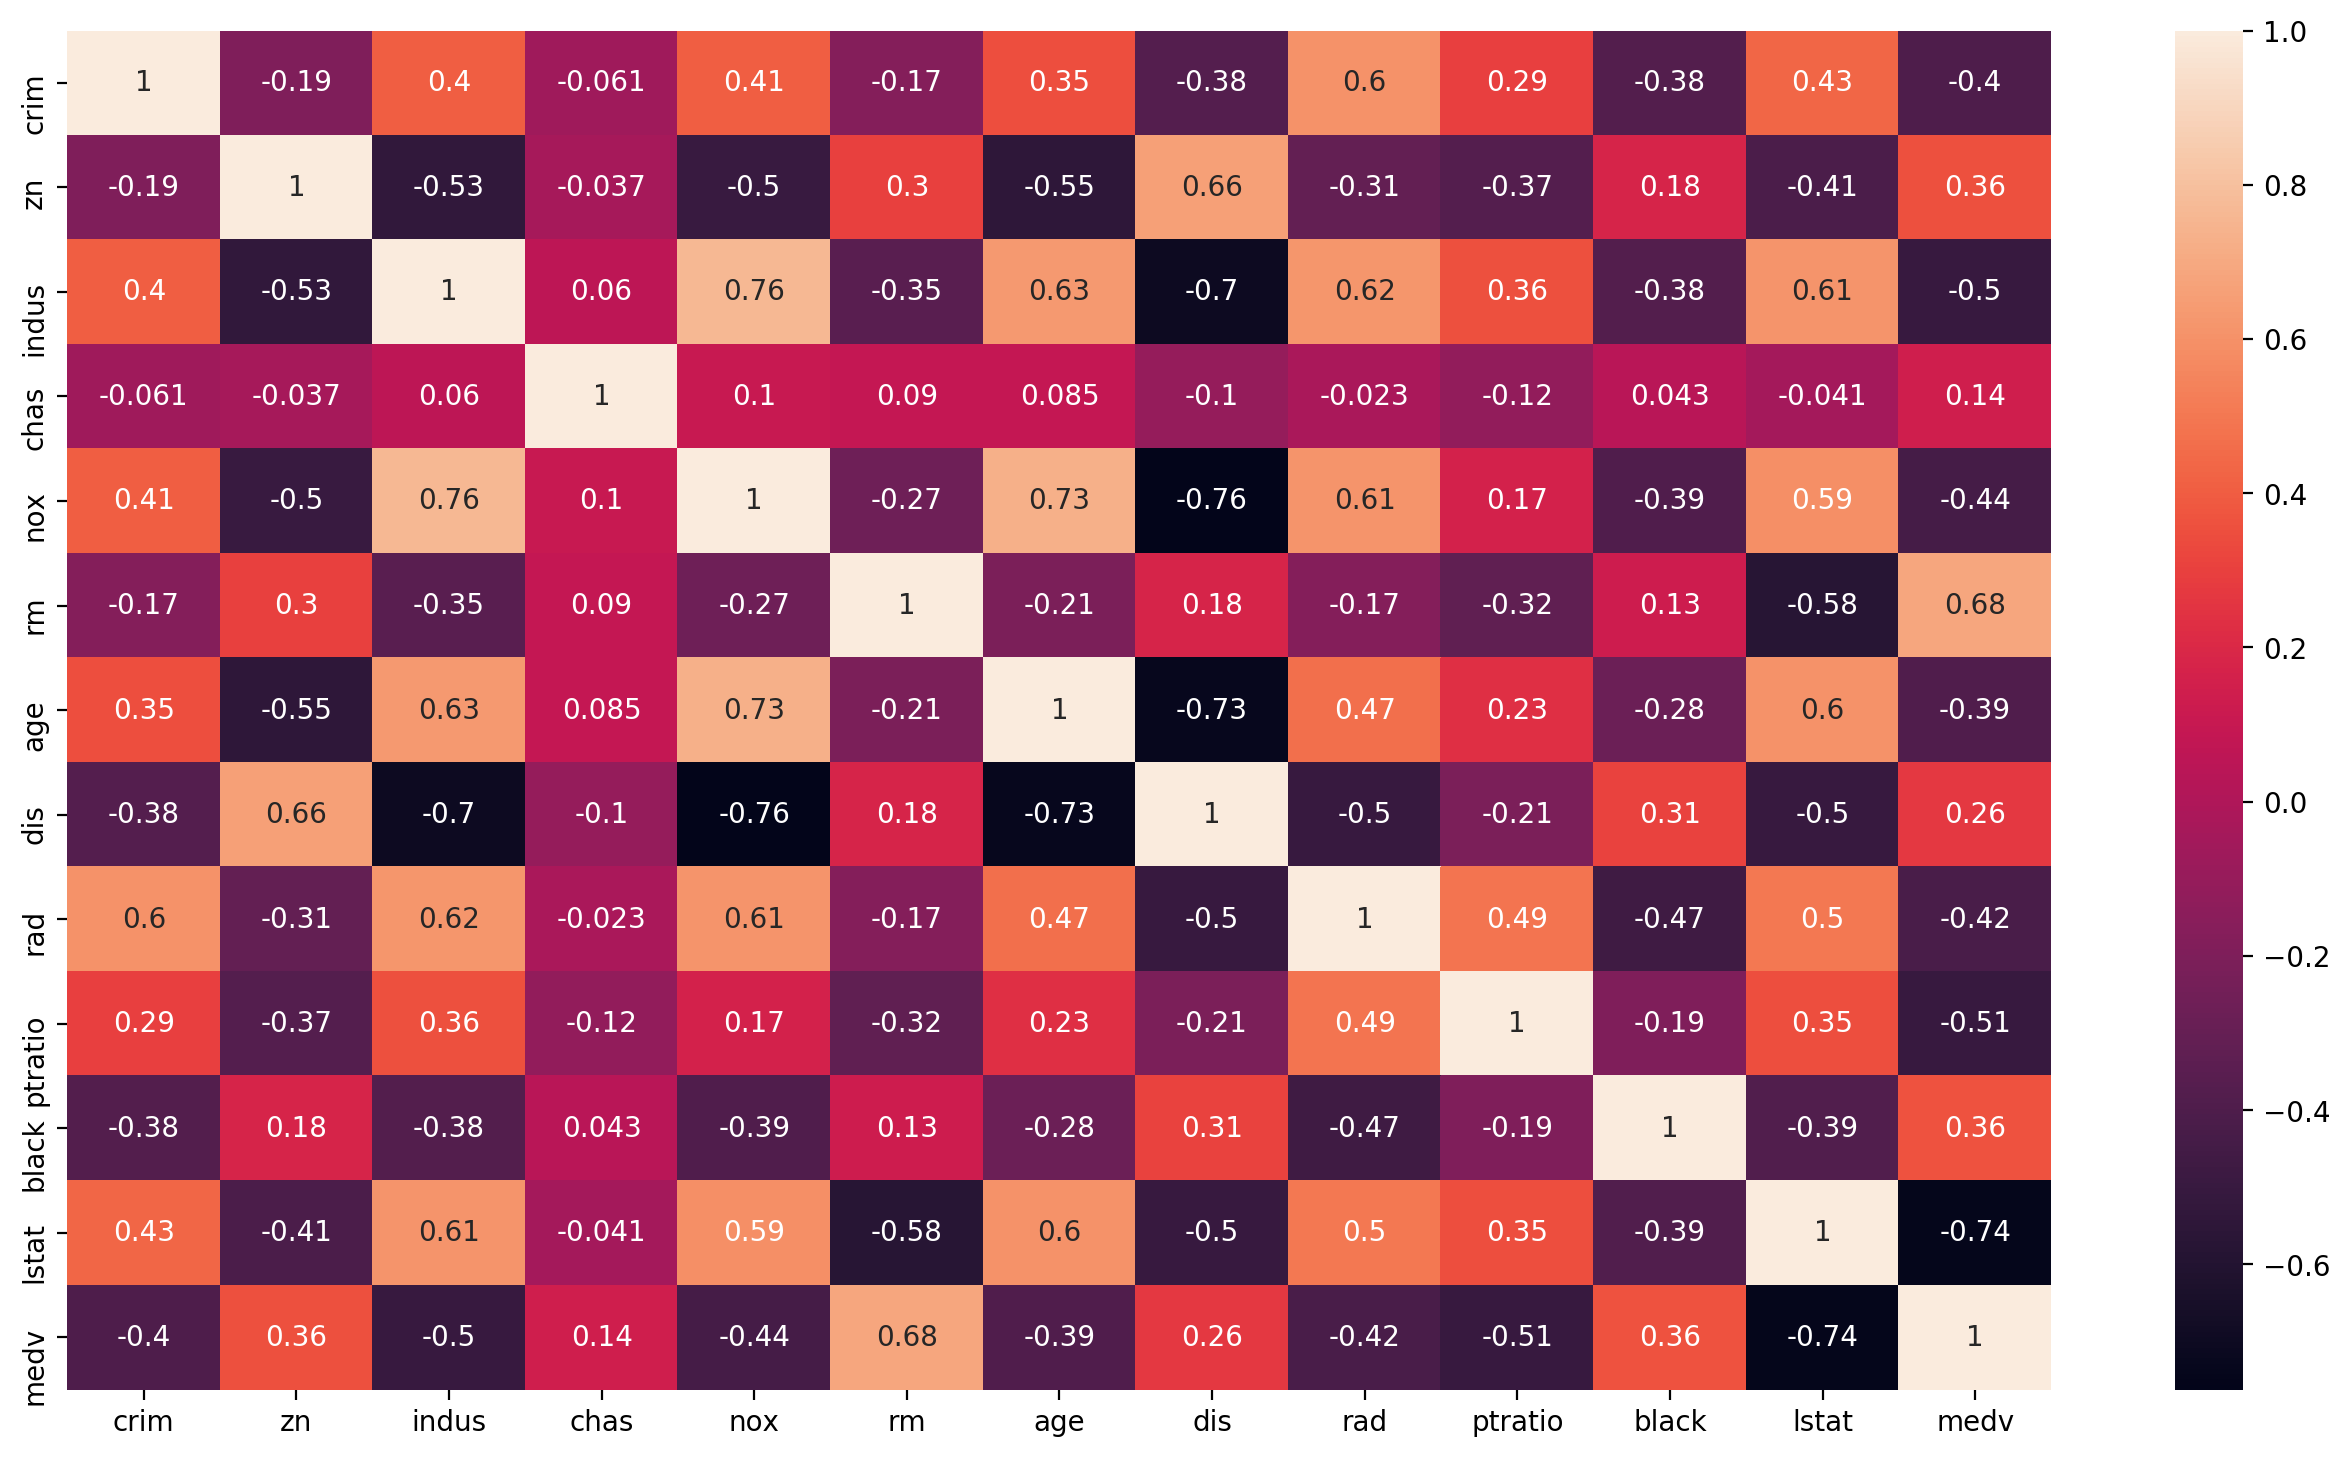

In [11]:
# Your plots here
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize= (16,9), dpi=200)
sns.heatmap(data.corr(), annot=True)

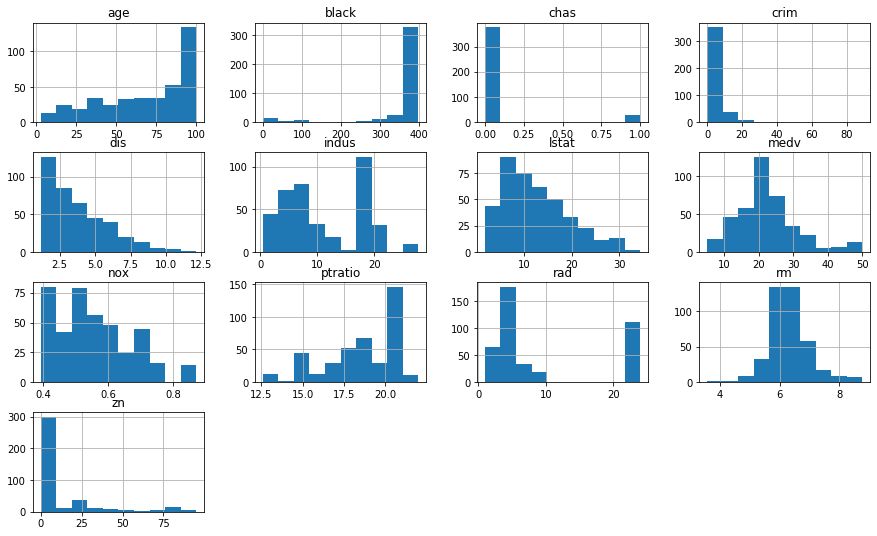

In [20]:
data.hist(figsize=(15,9))
plt.show()

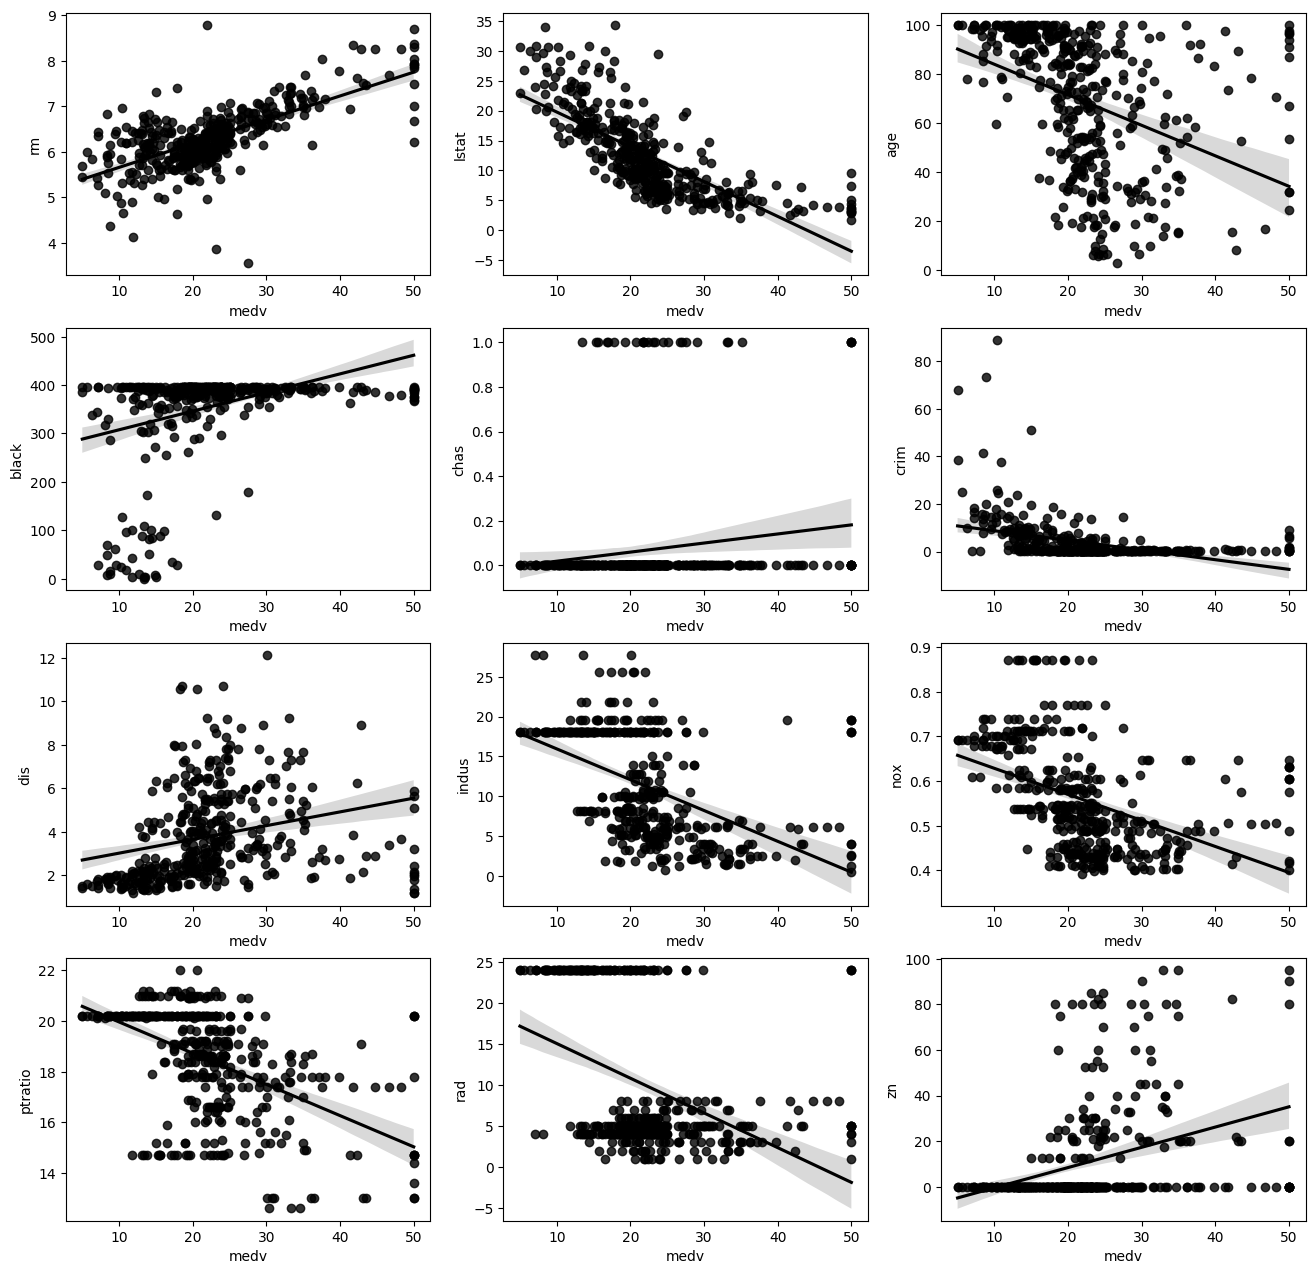

In [25]:
variables = ['rm','lstat','age','black','chas','crim','dis','indus','nox','ptratio','rad','zn']
fig, ax = plt.subplots(4,3,figsize= (16,16), dpi=100)
for i, j in zip(variables, ax.flatten()):
    sns.regplot('medv', i, data=data, scatter=True, color='black', ax=j)


In [ ]:
### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [ ]:
# Your response here
'''
I found 2 variables that has an explanatory relationship with the medv
rm: number of rooms, obviously the value goes up with more rooms ==> positive correlation
lstat: lower status of population, the higher is the lower status of population the lower value ==> negative correlation
'''

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

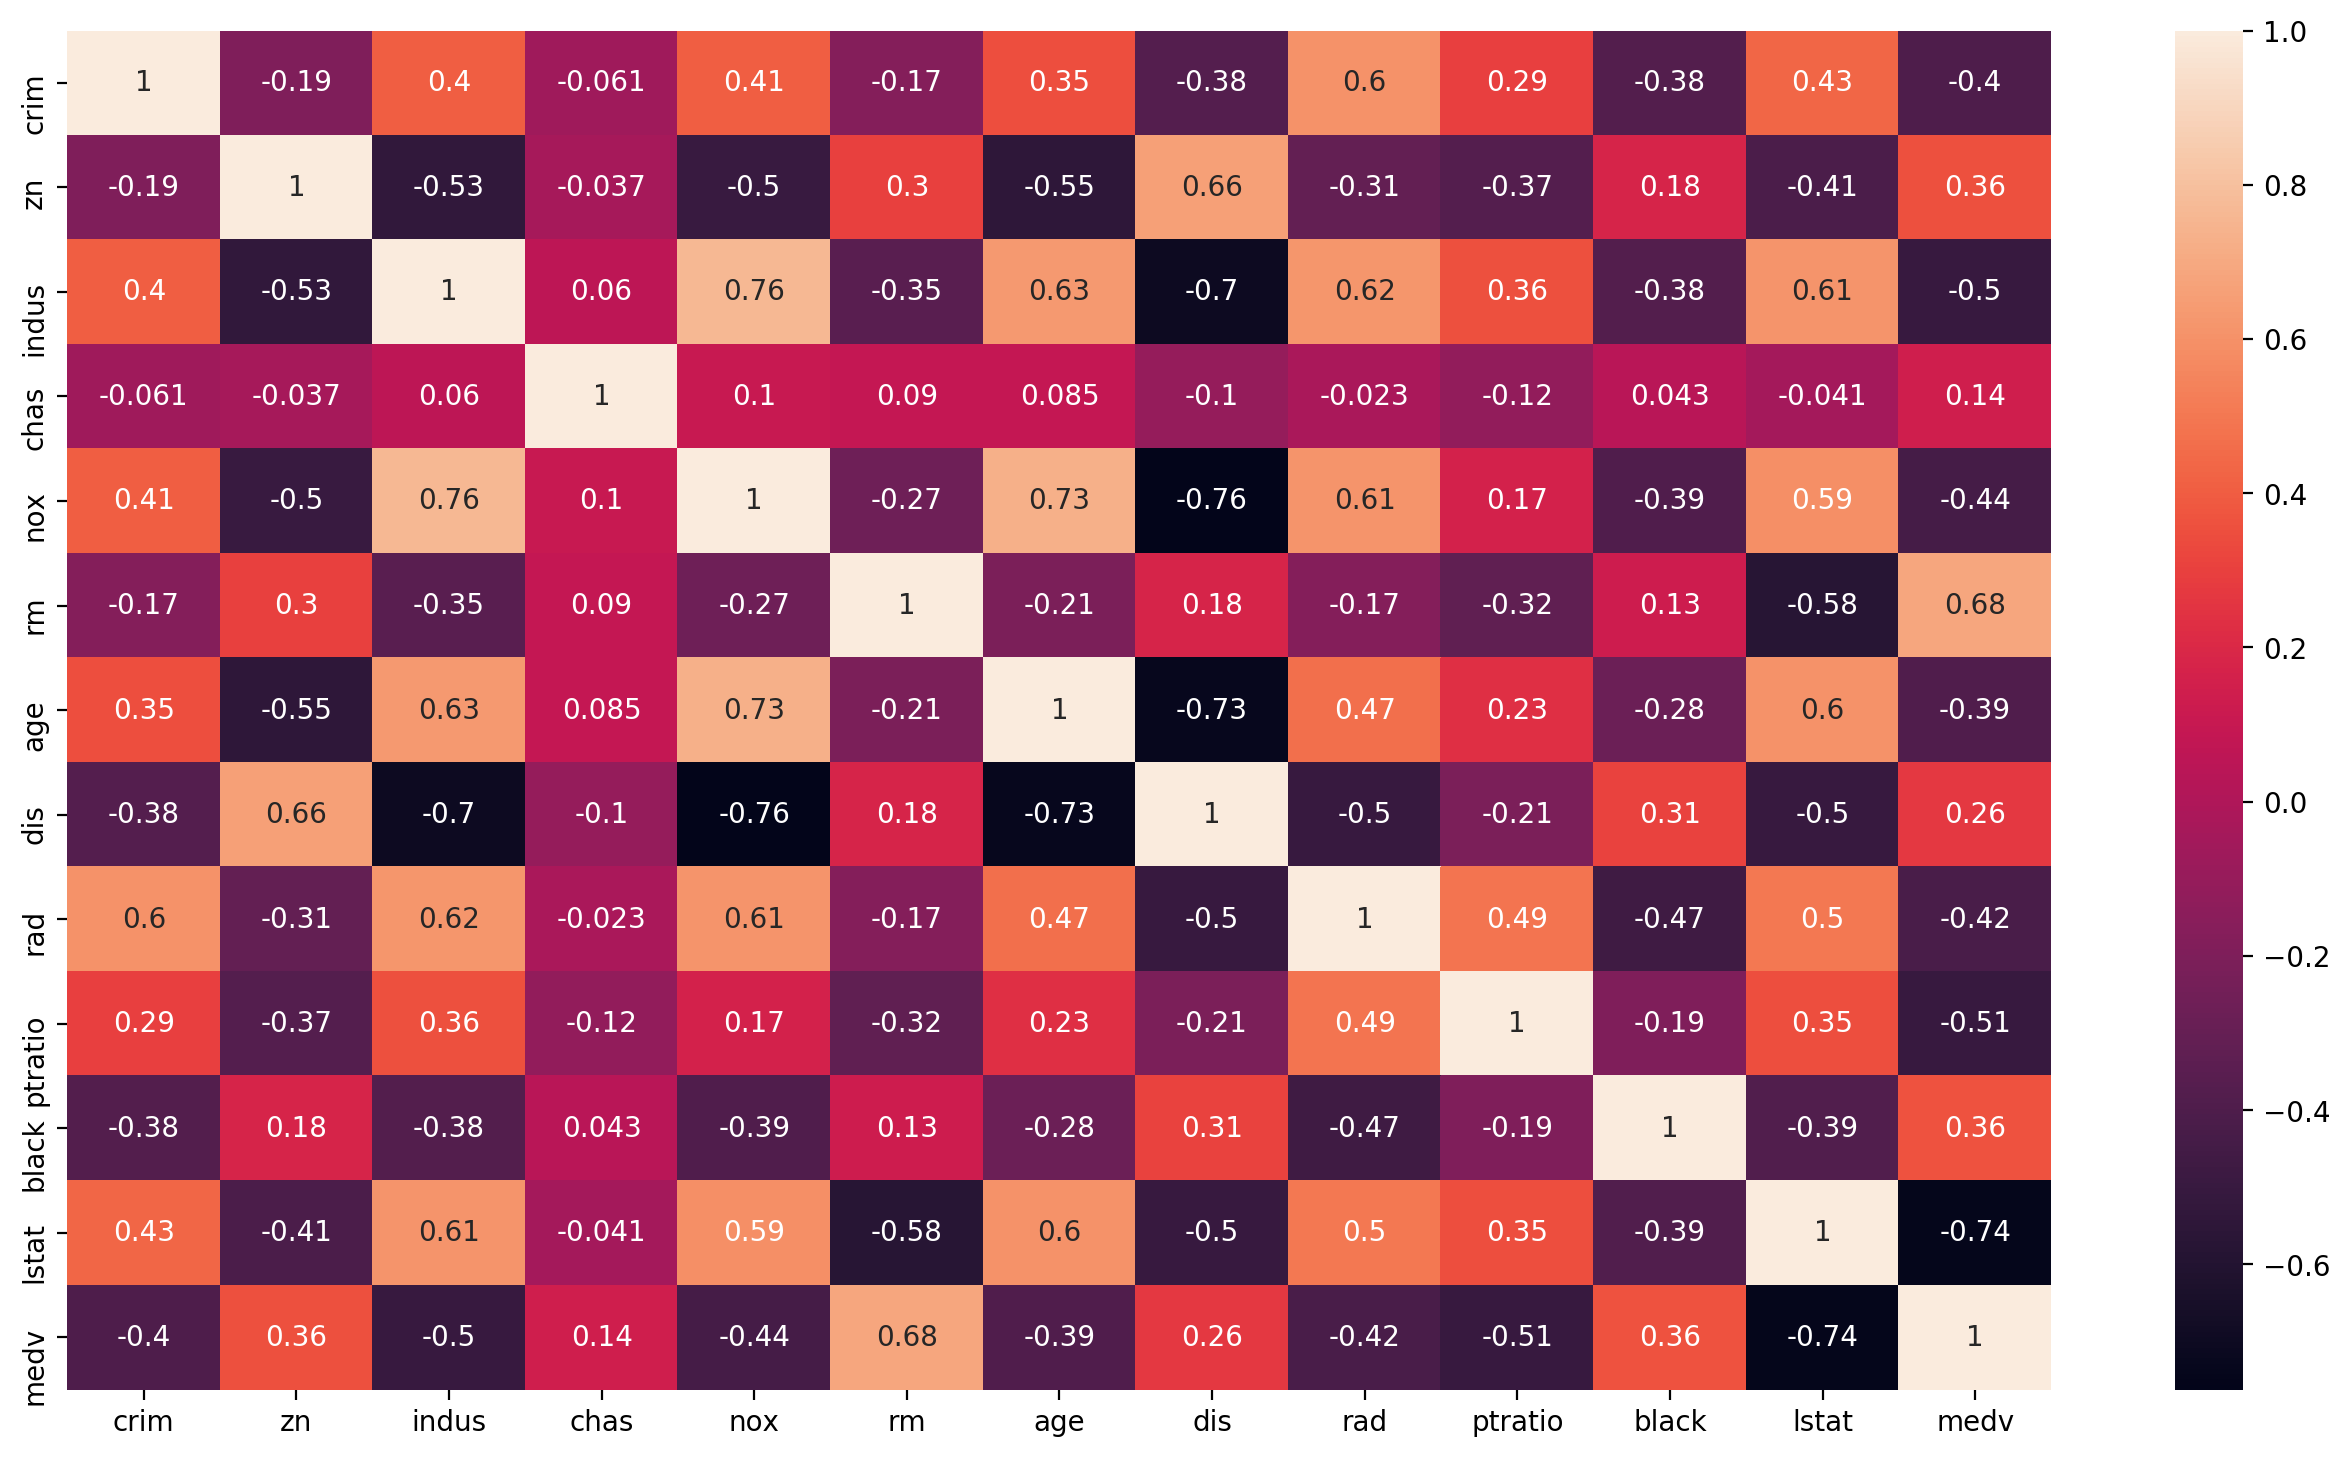

In [65]:
# Your response here
plt.figure(figsize= (16,9), dpi=200)
sns.heatmap(data.corr(), annot=True)
# I went a step forward and did this step previously, I dropped one column (tax) because it had high correlation with (rad)

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [66]:
# Your code here
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,22.000000,396.900000,34.370000,50.000000


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [7]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [28]:
# Your code here
from sklearn.model_selection import train_test_split
#X = data.drop(['medv'], axis=1)
#y = data.medv
X = data[['indus', 'rm', 'ptratio', 'lstat']]
y = data['medv']
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [29]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2)
result = regr.fit(X, y)

Now, plot the score for each tree on the training set and on the testing set.

the training scores:  [0.756320950396846, 0.8820389791858781, 0.9296349180131248, 0.9563368576534244, 0.9678806697986727]
the testing scores:   [0.7433203902931462, 0.8614592076731453, 0.9328647019856318, 0.9562327300421776, 0.9623453576547714]


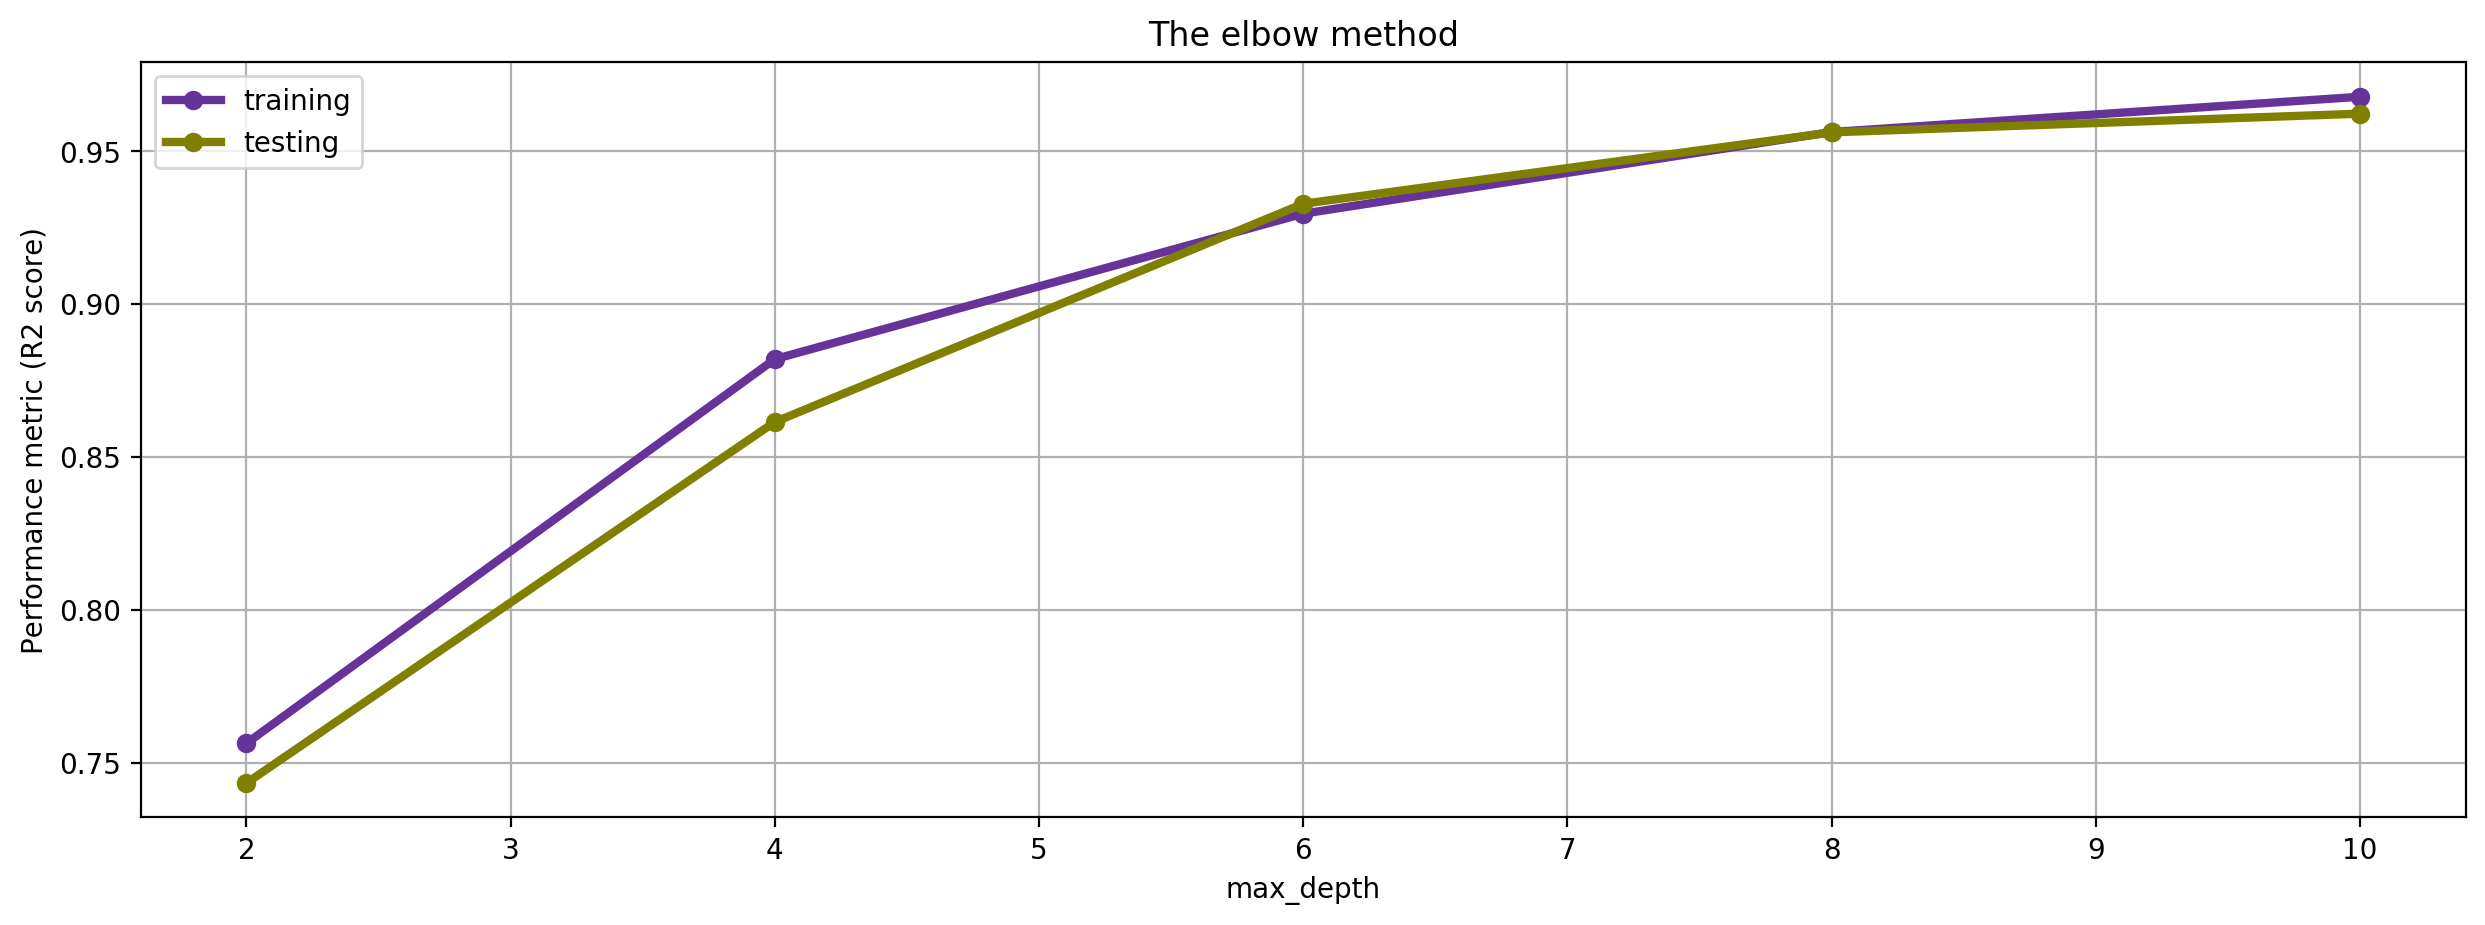

In [30]:
# Produce a plot with the score for the testing and training for the different max depths

max_depth =  [2, 4, 6, 8, 10]
training = []
testing = []

for i in max_depth:
    regr = RandomForestRegressor(max_depth=i, random_state=1).fit(X, y)
    y_predict_train = regr.predict(X_train)
    y_predict_test = regr.predict(X_test)
    training.append(performance_metric(y_train, y_predict_train))
    testing.append(performance_metric(y_test, y_predict_test))
    
print('the training scores: ',training)    
print('the testing scores:  ',testing)   

#Plotting the results onto a line graph, allowing us to observe 'The elbow'

plt.figure(figsize= (15,5), dpi=200)
plt.plot( max_depth, training, 'bo-', color='rebeccapurple', lw=3, label='training')
plt.plot( max_depth, testing, 'bo-', color='olive', lw=3, label='testing')
plt.grid()
plt.title('The elbow method')
plt.xlabel('max_depth')
plt.ylabel('Performance metric (R2 score)') 
plt.legend()
#plt.gca().invert_yaxis()
plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# Your response here
'''
the higher the max depth the better the score, but applying the elbow method we can see that with a max depth of 6 or even 4, it's more than enough, as the line flattens and the thus we got into the overfitting zone
'''

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [ ]:
# Your response here
'''
we know that Underfitting: minimizes variance and Overfitting: minimizes bias
when the model is trained with a max depth of 1 the model suffer from high bias (low variance)
when the model is trained with a max depth of 10 the model suffer from high variance (low bias)
for more info look at the graph in the slides
'''

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [ ]:
# Your response here
'''
I would choose a max depth of 4, I think it is the optimal, thanks to the elbow method it's clear that if we don't want to get into the overfitting zone we better stop there
the R2 score for training was 0.91, and the score for testing was 0.85
I think that's the sweet spot
'''

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here
'''
* 1978 data about housing prices is so obsolete, as housing is usually used for real estate investment and the prices are always going up, so the only purpuse is to have an historical reference (or to know how much was the cost back in the cool 70's)
* the features are enough, even too much features I would say, I dropped only one column that had high collinearity.
* yes, the model is consistent enough to make good predictions.
* there is no way a data collected in an urban city be applicable to a rural city.
'''